SHRUTI AGARWAL

# Import libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
df=pd.read_csv("C:/Users/SHRUTI AGARWAL/Desktop/SUMMER TRAINING/crop_yield.csv/crop_yield.csv")
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [5]:
df['Crop']=le.fit_transform(df['Crop'])
df['Season']=le.fit_transform(df['Season'])
df['State']=le.fit_transform(df['State'])

In [6]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


In [7]:
features_for_scaling = ["Area", "Annual_Rainfall", "Fertilizer", "Pesticide", "Yield"]
data_for_scaling = df[features_for_scaling]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data using the scaler
data_scaled = scaler.fit_transform(data_for_scaling)

# Convert the scaled data back to a DataFrame
data_scaled_df = pd.DataFrame(data_scaled, columns=features_for_scaling)

# Replace the original numerical features with the scaled features in the original DataFrame
df[features_for_scaling] = data_scaled_df

In [8]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,0,1997,4,2,-0.144802,56708,0.751197,-0.179880,-0.121745,-0.090128
1,1,1997,1,2,-0.236473,4685,0.751197,-0.247217,-0.219385,-0.090225
2,8,1997,1,2,-0.244443,22,0.751197,-0.253072,-0.227875,-0.090763
3,9,1997,4,2,-0.218707,126905000,0.751197,-0.234167,-0.200462,5.872928
4,11,1997,1,2,-0.243157,794,0.751197,-0.252127,-0.226504,-0.090555


[]

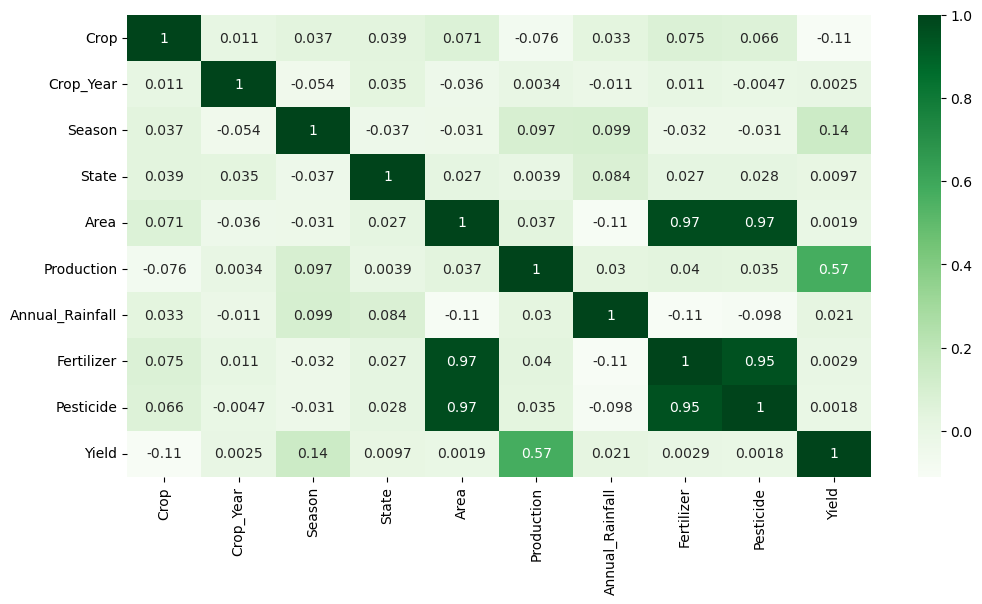

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True, cmap='Greens')
plt.plot()

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
x=df.drop('Yield',axis=1)
y=df['Yield']

In [ ]:
# from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=11)

# KNN regression

In [13]:
knn=KNeighborsRegressor(n_neighbors=15)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=15)

In [14]:
pred=knn.predict(x_test)
print(pred)

[-0.08782534 -0.08423713 -0.08875941 ... -0.08933058 -0.07792796
 -0.07986037]


In [18]:
knn_rmse=np.sqrt(mean_squared_error(y_test,pred))
print(knn_rmse)

0.48254362362591957


In [19]:
r2_score(y_test,pred)

0.7789961124738913

In [20]:
#now next regressor technique for comparision

# Random forest regression

In [22]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [23]:
rf_pred=rf_model.predict(x_test)

In [ ]:
rf_rmse=np.sqrt(mean_squared_error(y_test,rf_pred))
print(rf_rmse)

In [25]:
r2_score(y_test,rf_pred)

0.9858421250800344

# SVM regression

In [27]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')  
svr.fit(x_train, y_train)

SVR()

In [28]:
svr_pred=svr.predict(x_test)

In [29]:
svr_rmse=np.sqrt(mean_squared_error(y_test,svr_pred))
print(svr_rmse)

0.5499637214578229


In [30]:
r2_score(y_test,svr_pred)

0.7129253560465802

# Cat boost regression

In [32]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [33]:
catboost_regressor = CatBoostRegressor(iterations=1000, learning_rate=0.1,depth=6)
catboost_regressor.fit(x_train, y_train, verbose=100)

0:	learn: 0.9185003	total: 182ms	remaining: 3m 2s
100:	learn: 0.0812507	total: 678ms	remaining: 6.03s
200:	learn: 0.0481029	total: 1.17s	remaining: 4.66s
300:	learn: 0.0350175	total: 1.6s	remaining: 3.72s
400:	learn: 0.0258458	total: 1.95s	remaining: 2.91s
500:	learn: 0.0199988	total: 2.3s	remaining: 2.29s
600:	learn: 0.0154785	total: 2.66s	remaining: 1.76s
700:	learn: 0.0128057	total: 3s	remaining: 1.28s
800:	learn: 0.0107812	total: 3.34s	remaining: 831ms
900:	learn: 0.0091044	total: 3.69s	remaining: 405ms
999:	learn: 0.0079792	total: 4.04s	remaining: 0us


In [34]:
cb_pred = catboost_regressor.predict(x_test)

In [35]:
cat_rmse=np.sqrt(mean_squared_error(y_test,cb_pred))
print(cat_rmse)

0.13530697524921403


In [36]:
r2_score(y_test,cb_pred)

0.9826233072551886

# Cross validation

In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
cross_val_scores = cross_val_score(rf_model, x, y, cv=5, scoring='neg_mean_squared_error')


In [40]:
print(cross_val_scores)

[-0.06689669 -0.02535919 -0.00029762 -0.23202102 -0.02289461]


In [41]:
r2_scores = cross_val_score(rf_model, x, y, cv=5, scoring='r2')
print(r2_scores)

[0.97324076 0.98009176 0.99793517 0.6081655  0.94992854]


# Graph showing rmse score of all models

In [43]:
rmse_dict = {
    'KNN': knn_rmse,
    'SVR': svr_rmse,
    'Random Forest': rf_rmse,
    'CatBoost': cat_rmse
}


In [44]:
rmse_df = pd.DataFrame.from_dict(rmse_dict, orient='index', columns=['RMSE'])

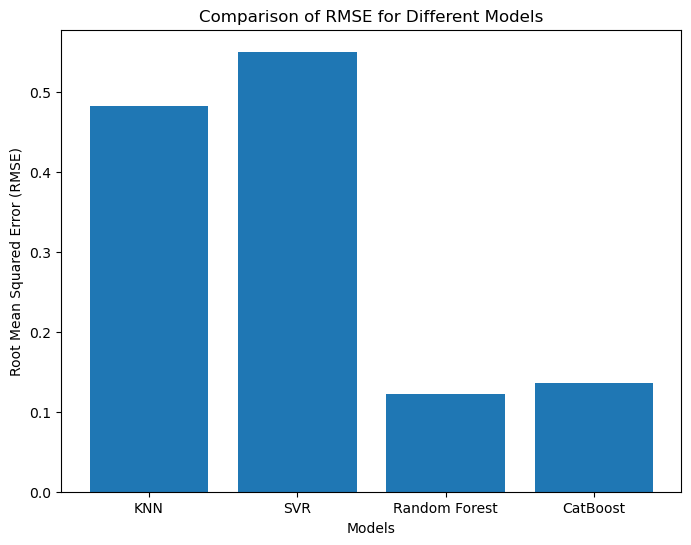

In [45]:
plt.figure(figsize=(8, 6))
plt.bar(rmse_df.index, rmse_df['RMSE'])
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Comparison of RMSE for Different Models')
plt.show()

# Predict the crop yield for new dataframe

In [47]:
data = {
    'Crop': [0, 1, 8],
    'Crop_Year': [1997, 1997, 1997],
    'Season': [4, 1, 1],
    'State': [2, 2, 2],
    'Area': [-0.144802, -0.236473, -0.244443],
    'Production': [56708, 4685, 22],
    'Annual_Rainfall': [0.751197, 0.751197, 0.751197],
    'Fertilizer': [-0.179880, -0.247217, -0.253072],
    'Pesticide': [-0.121745, -0.219385, -0.227875],
    'Yield': [-0.090128, -0.090225, -0.090763]
}

In [48]:
test_df = pd.DataFrame(data)

In [49]:
def predict_yield(rf_model, new_data):
    # 'new_data' should be a 2D array-like or DataFrame containing the new feature values
    predictions = rf_model.predict(new_data)
    return predictions

In [50]:
X_test = test_df.drop(columns=['Yield'])

In [55]:
predicted_yield = predict_yield(rf_model, X_test)


test_df['Predicted_Yield'] = predicted_yield


test_df

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Predicted_Yield
0,0,1997,4,2,-0.144802,56708,0.751197,-0.179880,-0.121745,-0.090128,-0.090118
1,1,1997,1,2,-0.236473,4685,0.751197,-0.247217,-0.219385,-0.090225,-0.090216
2,8,1997,1,2,-0.244443,22,0.751197,-0.253072,-0.227875,-0.090763,-0.090800
